In [1]:
%matplotlib inline

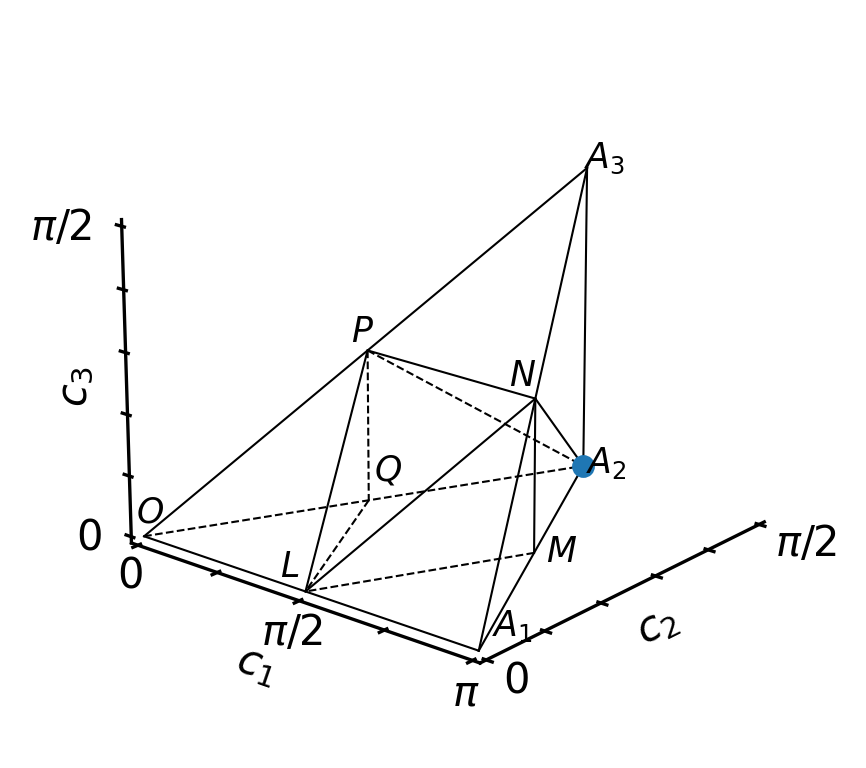

In [2]:
# visualize weyl chamber coordinates
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
# qc.cnot(0, 1)
# # random u
# qc.u(0.1, 0.2, 0.3, 0)
# qc.u(0.1, 0.2, 0.3, 1)
# qc.swap(0, 1)
# qc.u(0.1, 0.2, 0.3, 0)
# qc.u(0.1, 0.2, 0.3, 1)
# qc.cnot(0, 1)
# qc.u(0.1, 0.2, 0.3, 0)
# qc.u(0.1, 0.2, 0.3, 1)
# qc.iswap(0,1)
# qc.cnot(0, 1)

qc.cnot(1, 0)
qc.cnot(0, 1)

from qiskit.quantum_info import Operator

op = Operator(qc).data

from weylchamber import c1c2c3, WeylChamber

w = WeylChamber()
w.add_point(*c1c2c3(op))
w.plot()

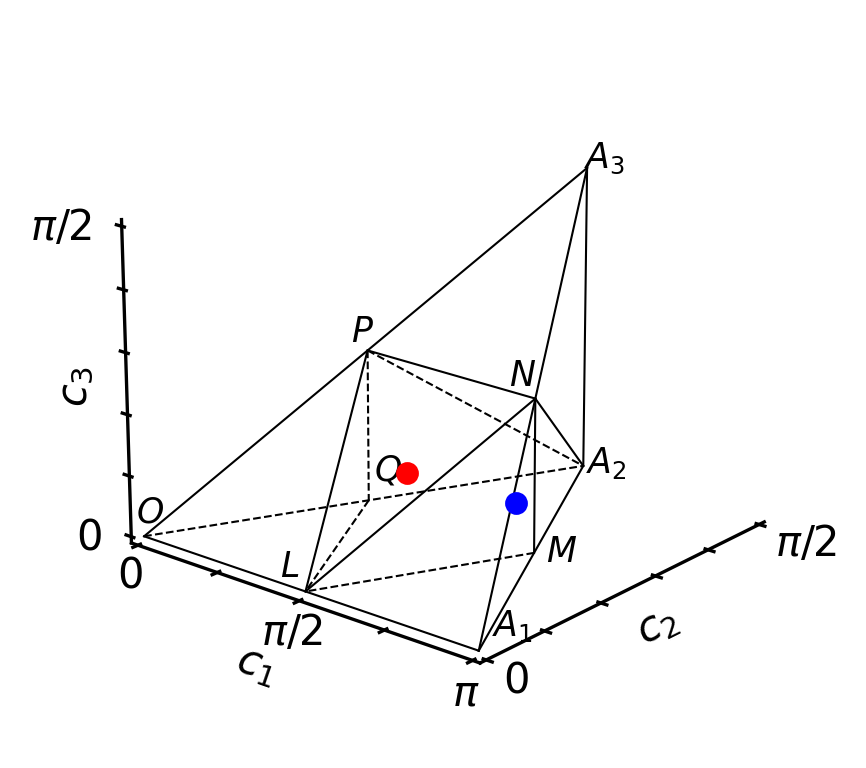

In [3]:
w = WeylChamber()

# generate Haar random unitary
from qiskit.quantum_info import random_unitary

op = random_unitary(4).data
qc = QuantumCircuit(2)
qc.unitary(op, [0, 1])
op = Operator(qc).data
w.scatter(*c1c2c3(op), color="blue")
qc.swap(0, 1)
op2 = Operator(qc).data
w.scatter(*c1c2c3(op2), color="red")
w.plot()

In [11]:
import numpy as np
from qiskit.quantum_info import random_unitary
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from matplotlib import cm

w = WeylChamber()


# Generate many random unitaries
N = 1000
coords_initial = []
coords_final = []
for _ in range(N):
    # Generate Haar random unitary
    op = random_unitary(4).data
    qc = QuantumCircuit(2)
    qc.unitary(op, [0, 1])
    op = Operator(qc).data
    coords_initial.append(c1c2c3(op))

    # Apply SWAP
    qc.swap(0, 1)
    op2 = Operator(qc).data
    coords_final.append(c1c2c3(op2))

# Convert to numpy arrays for easier handling
coords_initial = np.array(coords_initial)
coords_final = np.array(coords_final)

# Plot initial points with blue color
w.scatter(
    coords_initial[:, 0], coords_initial[:, 1], coords_initial[:, 2], color="blue"
)

# Plot final points with red color
w.scatter(coords_final[:, 0], coords_final[:, 1], coords_final[:, 2], color="red")

import matplotlib as mpl

# Create a color map with 256 colors
color_map = mpl.cm.get_cmap("viridis", 256)

# Generate colors from the color map
colors = color_map(np.linspace(0, 1, N))

# Plot trajectories
for i in range(N):
    w._draw_line(
        (coords_initial[i, 0], coords_initial[i, 1], coords_initial[i, 2]),
        (coords_final[i, 0], coords_final[i, 1], coords_final[i, 2]),
        color=colors[i],
    )

/tmp/ipykernel_8214/1801803694.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = mpl.cm.get_cmap('viridis', 256)


TypeError: _draw_line() missing 1 required positional argument: 'end'

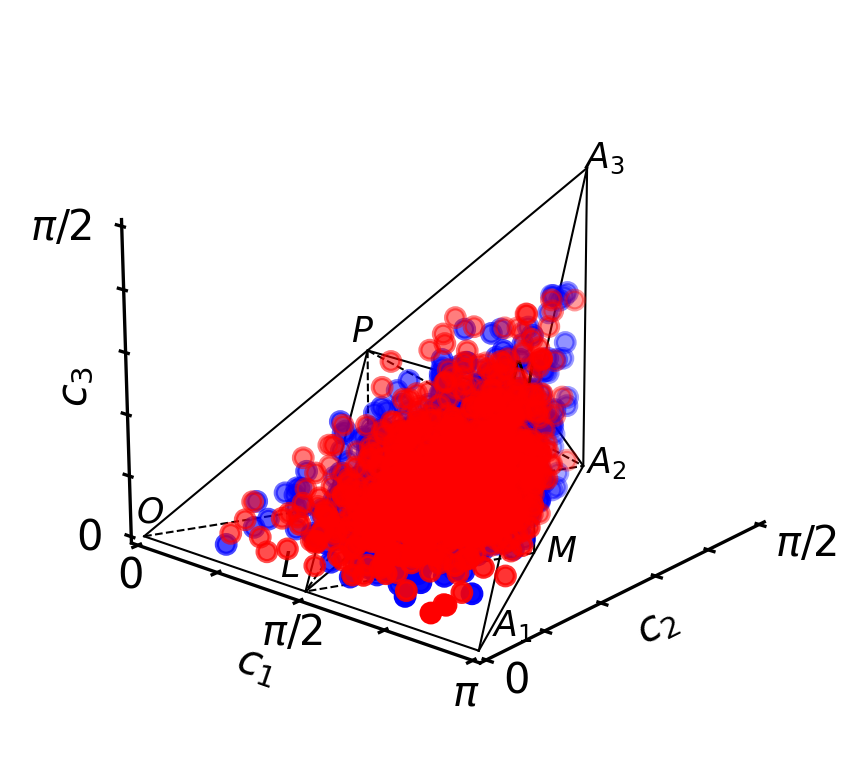

In [12]:
w.plot()